# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [65]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | An airline that lives in the...
1,✅ Trip Verified | Check-in Desk rude and dism...
2,✅ Trip Verified | I chose British Airways espe...
3,Not Verified | I booked Premium Economy from I...
4,✅ Trip Verified | A simple story with an unfor...


In [66]:
df.to_csv("C:\\Users\\ADMIN\\Documents\\Data\\BA_reviews.csv",index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Data Cleaning

In [67]:
#Read the data(csv)
import pandas as pd
BA_reviews= pd.read_csv("C:\\Users\\ADMIN\\Documents\\Data\\BA_reviews.csv")
print(BA_reviews)

                                               reviews
0    ✅ Trip Verified | An airline that lives in the...
1    ✅ Trip Verified |  Check-in Desk rude and dism...
2    ✅ Trip Verified | I chose British Airways espe...
3    Not Verified | I booked Premium Economy from I...
4    ✅ Trip Verified | A simple story with an unfor...
..                                                 ...
995  ✅ Trip Verified | We flew from Los Angeles to ...
996  ✅ Trip Verified |  Brindisi to London. Flying ...
997  ✅ Trip Verified |  Chicago to London. I have f...
998  ✅ Trip Verified |  Berlin to London. It was a ...
999  ✅ Trip Verified |  British Airways is my favor...

[1000 rows x 1 columns]


In [68]:
#Our CSV date has two columns, one showing if the review is verified or not, and the other with the review itself. 
#We only need the reviews for this analysis so we should drop the column showing if a review is verified or not. 
#Since this is a CSV, and it is delimited by the pipe, we need to delimit the two columns.
BA_reviews[['reviews', 'reviews1']] = BA_reviews['reviews'].str.split(pat='|',  expand=True)
print(BA_reviews)

              reviews                                           reviews1
0    ✅ Trip Verified    An airline that lives in their past glory and...
1    ✅ Trip Verified     Check-in Desk rude and dismissive. Flight la...
2    ✅ Trip Verified    I chose British Airways especially because I ...
3       Not Verified    I booked Premium Economy from INV to LAX (via...
4    ✅ Trip Verified    A simple story with an unfortunate outcome th...
..                ...                                                ...
995  ✅ Trip Verified    We flew from Los Angeles to Leeds Bradford vi...
996  ✅ Trip Verified     Brindisi to London. Flying from any airport ...
997  ✅ Trip Verified     Chicago to London. I have flown long haul ma...
998  ✅ Trip Verified     Berlin to London. It was a connecting flight...
999  ✅ Trip Verified     British Airways is my favorite airline. Boei...

[1000 rows x 2 columns]


In [69]:
#Next we need to drop the first column showing if reviews are verified or not.
#inplace=true did not work hear. It is usefull to permanently frop a column. (I will research more)
BA_reviews = BA_reviews.drop('reviews', axis=1)
print(BA_reviews)

                                              reviews1
0     An airline that lives in their past glory and...
1      Check-in Desk rude and dismissive. Flight la...
2     I chose British Airways especially because I ...
3     I booked Premium Economy from INV to LAX (via...
4     A simple story with an unfortunate outcome th...
..                                                 ...
995   We flew from Los Angeles to Leeds Bradford vi...
996    Brindisi to London. Flying from any airport ...
997    Chicago to London. I have flown long haul ma...
998    Berlin to London. It was a connecting flight...
999    British Airways is my favorite airline. Boei...

[1000 rows x 1 columns]


In [70]:
#Here we remove leading, trailing, and double spaces.
#str.strip cleans leading and trailing spaces.
#re.sub uses re to clean double spaces. str.replace could have also been used instead
import re
BA_reviews['reviews1']=BA_reviews['reviews1'].str.strip().apply(lambda x: re.sub(' +', ' ', x))
print(BA_reviews)

                                              reviews1
0    An airline that lives in their past glory and ...
1    Check-in Desk rude and dismissive. Flight late...
2    I chose British Airways especially because I w...
3    I booked Premium Economy from INV to LAX (via ...
4    A simple story with an unfortunate outcome tha...
..                                                 ...
995  We flew from Los Angeles to Leeds Bradford via...
996  Brindisi to London. Flying from any airport th...
997  Chicago to London. I have flown long haul many...
998  Berlin to London. It was a connecting flight, ...
999  British Airways is my favorite airline. Boeing...

[1000 rows x 1 columns]


In [71]:
'''Removal of special characters and punctuation: Remove unnecessary characters like hashtags, 
exclamation marks, and other punctuation marks that may not contribute to the sentiment analysis.'''
import re

def remove_special_characters(text):
    # Replace special characters and punctuation with a space
    cleaned_text = re.sub('[^\w\s]', ' ', text)
    return cleaned_text

# Apply the function to a DataFrame column
BA_reviews['reviews1'] = BA_reviews['reviews1'] .apply(remove_special_characters)
print(BA_reviews)


                                              reviews1
0    An airline that lives in their past glory and ...
1    Check in Desk rude and dismissive  Flight late...
2    I chose British Airways especially because I w...
3    I booked Premium Economy from INV to LAX  via ...
4    A simple story with an unfortunate outcome tha...
..                                                 ...
995  We flew from Los Angeles to Leeds Bradford via...
996  Brindisi to London  Flying from any airport th...
997  Chicago to London  I have flown long haul many...
998  Berlin to London  It was a connecting flight  ...
999  British Airways is my favorite airline  Boeing...

[1000 rows x 1 columns]


In [72]:
#Lowercasing: Convert all text to lowercase to ensure consistency and avoid treating the same word with different cases as different entities.
BA_reviews['reviews1']=BA_reviews['reviews1'].str.lower()
print(BA_reviews)

                                              reviews1
0    an airline that lives in their past glory and ...
1    check in desk rude and dismissive  flight late...
2    i chose british airways especially because i w...
3    i booked premium economy from inv to lax  via ...
4    a simple story with an unfortunate outcome tha...
..                                                 ...
995  we flew from los angeles to leeds bradford via...
996  brindisi to london  flying from any airport th...
997  chicago to london  i have flown long haul many...
998  berlin to london  it was a connecting flight  ...
999  british airways is my favorite airline  boeing...

[1000 rows x 1 columns]


In [73]:
'''Tokenization: Split the text into individual words or tokens, as this is often the basic unit of analysis 
in natural language processing (NLP) tasks. This step helps in preprocessing and feature extraction.'''
import nltk

# Download the necessary NLTK resources for tokenization
nltk.download('punkt')

BA_reviews['reviews1']=BA_reviews['reviews1'].apply(nltk.word_tokenize)
print(BA_reviews)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              reviews1
0    [an, airline, that, lives, in, their, past, gl...
1    [check, in, desk, rude, and, dismissive, fligh...
2    [i, chose, british, airways, especially, becau...
3    [i, booked, premium, economy, from, inv, to, l...
4    [a, simple, story, with, an, unfortunate, outc...
..                                                 ...
995  [we, flew, from, los, angeles, to, leeds, brad...
996  [brindisi, to, london, flying, from, any, airp...
997  [chicago, to, london, i, have, flown, long, ha...
998  [berlin, to, london, it, was, a, connecting, f...
999  [british, airways, is, my, favorite, airline, ...

[1000 rows x 1 columns]


In [74]:
'''Stop word removal: Eliminate common words (e.g., "the," "is," "and") known as stop words,
 as they usually do not carry significant sentiment information. 
Consider using a predefined list of stop words or a library like NLTK (Natural Language Toolkit) to handle this.'''
import nltk
from nltk.corpus import stopwords

# Download the stop words corpus
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

BA_reviews['reviews1']=BA_reviews['reviews1'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
'''Handling contractions: Expand contractions (e.g., "can't" to "cannot," "don't" to "do not")
 to ensure consistency in word representation.'''
'''We pip install the library contractions to enable use to remove automatically detects and 
removes contractions from text without explicitly specifying each contraction.'''

import contractions


def remove_contractions(tokens):
    # Convert list of tokens to a single string
    text = ' '.join(tokens)
    
    # Remove contractions from the text
    expanded_text = contractions.fix(text)
    
    # Convert the expanded text back to a list of tokens
    expanded_tokens = expanded_text.split()
    
    return expanded_tokens

BA_reviews['reviews1']=BA_reviews['reviews1'].apply(remove_contractions)



In [76]:
'''Handling spelling errors to correct common spelling mistakes. 
Accurate spelling can improve sentiment analysis results.
import textblob
from textblob import TextBlob

def correct_spelling(text):
    blob = TextBlob(str(text))  # Convert text to string
    corrected_text = str(blob.correct())
    return corrected_text

# Apply the function to the 'review_text' column
BA_reviews['reviews1']=BA_reviews['reviews1'].apply(correct_spelling)'''


"Handling spelling errors to correct common spelling mistakes. \nAccurate spelling can improve sentiment analysis results.\nimport textblob\nfrom textblob import TextBlob\n\ndef correct_spelling(text):\n    blob = TextBlob(str(text))  # Convert text to string\n    corrected_text = str(blob.correct())\n    return corrected_text\n\n# Apply the function to the 'review_text' column\nBA_reviews['reviews1']=BA_reviews['reviews1'].apply(correct_spelling)"

In [77]:
'''Lemmatization or stemming: Reduce words to their base or root form. 
Lemmatization produces valid words, while stemming can be faster but may produce non-real words.
 These techniques help in reducing word variations and improving feature extraction.'''
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet corpus
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

BA_reviews['reviews1']=BA_reviews['reviews1'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sentiment Analysis 

In [78]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    '''Join the list of strings into a single string because yhe SentimentIntensityAnalyzer
    from NLTK expects a string as input'''
    text = ' '.join(text)

    # Perform sentiment analysis
    sentiment_scores = sid.polarity_scores(text)

    # Classify sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment

# Apply sentiment analysis to each review in 'reviews1' column
BA_reviews['Sentiment'] = BA_reviews['reviews1'].apply(analyze_sentiment)

# Print the updated DataFrame
print(BA_reviews)

                                              reviews1 Sentiment
0    [airline, life, past, glory, heading, future, ...  Negative
1    [check, desk, rude, dismissive, flight, late, ...  Negative
2    [chose, british, airway, especially, going, tr...  Negative
3    [booked, premium, economy, inv, lax, via, lhr,...  Negative
4    [simple, story, unfortunate, outcome, really, ...  Positive
..                                                 ...       ...
995  [flew, los, angeles, leeds, bradford, via, hea...  Positive
996  [brindisi, london, flying, airport, includes, ...  Positive
997  [chicago, london, flown, long, haul, many, tim...  Positive
998  [berlin, london, connecting, flight, complain,...  Positive
999  [british, airway, favorite, airline, boeing, 7...  Positive

[1000 rows x 2 columns]


Sentiment
Positive    589
Negative    390
Neutral      21
Name: count, dtype: int64


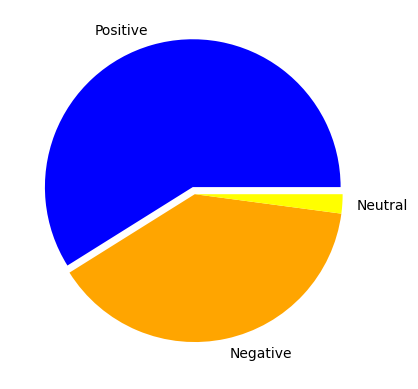

In [79]:
#sentiment count
sentiment_counts = BA_reviews['Sentiment'].value_counts()
#print(sentiment_counts)
#Find percentage
sentiment_perc= (sentiment_counts / len(BA_reviews))*100
print(sentiment_counts)

#Pie Chart
import matplotlib.pyplot as plt

fig, ax=plt.subplots()
ax.pie(
    sentiment_perc,
    labels=sentiment_perc.index,
    colors=['blue','orange','yellow'],
    explode=[0.05,0,0]

)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


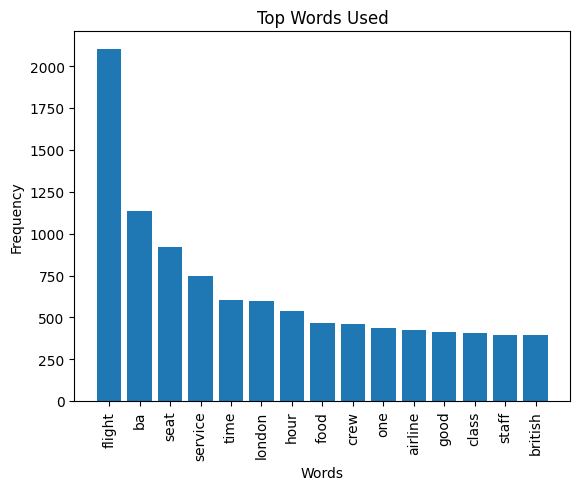

In [83]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')

def count_word_frequencies(text):
    # Convert list of words to a string
    text_str = ' '.join(text)
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text_str)
    word_freq = Counter(words)
    return word_freq

# Apply the function to each row of the 'reviews1' column
BA_reviews['Sentiment'] = BA_reviews['reviews1'].apply(count_word_frequencies)

# Combine all word frequencies
all_word_freq = Counter()
for word_freq in BA_reviews['Sentiment']:
    all_word_freq.update(word_freq)

# Get the top 15 most frequent words and their frequencies
top_words = all_word_freq.most_common(15)
top_words = dict(top_words)  # Convert to dictionary for easier plotting

# Plot the bar graph
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words Used')
plt.xticks(rotation=90)


plt.show()